Figure out what minimum budget you need to get a movie with the best chances of success
Group everything by year
add column with percentage of movie budget vs budget for movies that year
add column with percentage of movie grossing worldwide vs grossing worldwide for movies that year
add column that does a ratio for percent budget and percent grossing. budget % / grossing %. sort lowest to greatest to get movies that did the best with lower budgets.

Take buckets to see what percentage of movies did well with different buckets of budget amounts

In [2]:
#Imports
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt




In [ ]:
#prepare and save cleaned data csv
%run clean_data.py

Read in Dataframe and analyze data types and info about structure

In [5]:
#Read in the data
imdb_all_years_df = pd.read_csv("./Resources/cleaned_data.csv")
imdb_all_years_df.info()
imdb_all_years_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33600 entries, 0 to 33599
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  33600 non-null  object 
 1   Movie Link             33600 non-null  object 
 2   Year                   33600 non-null  int64  
 3   Duration               33379 non-null  object 
 4   MPA                    25624 non-null  object 
 5   Rating                 33462 non-null  float64
 6   Votes                  33462 non-null  object 
 7   budget                 11815 non-null  float64
 8   grossWorldWide         18222 non-null  float64
 9   gross_US_Canada        17571 non-null  float64
 10  opening_weekend_Gross  15523 non-null  float64
 11  directors              33600 non-null  object 
 12  writers                33600 non-null  object 
 13  stars                  33600 non-null  object 
 14  genres                 33600 non-null  object 
 15  co

,Title,Movie Link,Year,Duration,MPA,Rating,Votes,budget,grossWorldWide,gross_US_Canada,...,stars,genres,countries_origin,filming_locations,production_companies,Languages,wins,nominations,oscars,release_date
0,Swiss Family Robinson,Swiss Family Robinson,1960,2h 6m,Approved,7.1,19K,5000000.0,40357287.0,40356000.0,...,"['John Mills', 'Dorothy McGuire', 'James MacAr...","['Survival', 'Adventure', 'Family']",['United States'],"['Tobago, Trinidad and Tobago']",['Walt Disney Productions'],"['English', 'Malay']",0,0,0,1960.0
1,Psycho,Psycho,1960,1h 49m,R,8.5,741K,806947.0,32066835.0,32000000.0,...,"['Anthony Perkins', 'Janet Leigh', 'Vera Miles']","['Psychological Horror', 'Psychological Thrill...",['United States'],"['Psycho House and Bates Motel, Backlot Univer...","['Alfred J. Hitchcock Productions', 'Shamley P...",['English'],0,14,4,1960.0
2,The Apartment,The Apartment,1960,2h 5m,Approved,8.3,204K,3000000.0,18778738.0,18600000.0,...,"['Jack Lemmon', 'Shirley MacLaine', 'Fred MacM...","['Farce', 'Holiday Comedy', 'Holiday Romance',...",['United States'],"['Majestic Theater, 247 West 44th Street, Manh...",['The Mirisch Corporation'],['English'],0,8,0,1960.0
3,Spartacus,Spartacus,1960,3h 17m,PG-13,7.9,146K,12000000.0,1846975.0,1830650.0,...,"['Kirk Douglas', 'Laurence Olivier', 'Jean Sim...","['Adventure Epic', 'Historical Epic', 'Sword &...",['United States'],"['Hearst Castle, San Simeon, California, USA']",['Bryna Productions'],['English'],0,11,0,1960.0
4,Breathless,Breathless,1960,1h 30m,Not Rated,7.7,90K,400000.0,594039.0,414173.0,...,"['Jean-Paul Belmondo', 'Jean Seberg', 'Van Dou...","['Caper', 'Crime', 'Drama']",['France'],"['11 rue Campagne Première, Paris 14, Paris, F...","['Les Films Impéria', 'Les Productions Georges...","['French', 'English']",0,4,1,1960.0


Clean Up Data

In [141]:
#replace NaN with 0
# imdb_all_years_df = imdb_all_years_df.fillna(1)
# imdb_all_years_df = imdb_all_years_df.dropna(how="any")

#drop all rows that have nan for budget column
budget_df = imdb_all_years_df.dropna(subset=['budget'])
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11815 entries, 0 to 33587
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  11815 non-null  object 
 1   Movie Link             11815 non-null  object 
 2   Year                   11815 non-null  int64  
 3   Duration               11802 non-null  object 
 4   MPA                    11113 non-null  object 
 5   Rating                 11813 non-null  float64
 6   Votes                  11813 non-null  object 
 7   budget                 11815 non-null  float64
 8   grossWorldWide         9406 non-null   float64
 9   gross_US_Canada        8970 non-null   float64
 10  opening_weekend_Gross  8409 non-null   float64
 11  directors              11815 non-null  object 
 12  writers                11815 non-null  object 
 13  stars                  11815 non-null  object 
 14  genres                 11815 non-null  object 
 15  countri

In [129]:
imdb_all_years_df.dtypes

Title                    string[python]
Movie Link               string[python]
Year                              int64
Duration                         object
MPA                              object
Rating                          float64
Votes                            object
budget                          float64
grossWorldWide                  float64
gross_US_Canada                 float64
opening_weekend_Gross           float64
directors                        object
writers                          object
stars                            object
genres                           object
countries_origin                 object
filming_locations                object
production_companies             object
Languages                        object
wins                              int64
nominations                       int64
oscars                            int64
release_date                    float64
dtype: object

In [130]:
#sort values by year
imbd_all_years_df = imdb_all_years_df.sort_values(by='Year')

#group by year, title and grossWorldWide and display dataframe
group_by_year_imbd_all_years_df = imdb_all_years_df.groupby(['Year', 'Title'])['grossWorldWide'].mean()

Group and graph data showing worldwide gross of movies over time

<BarContainer object of 33600 artists>

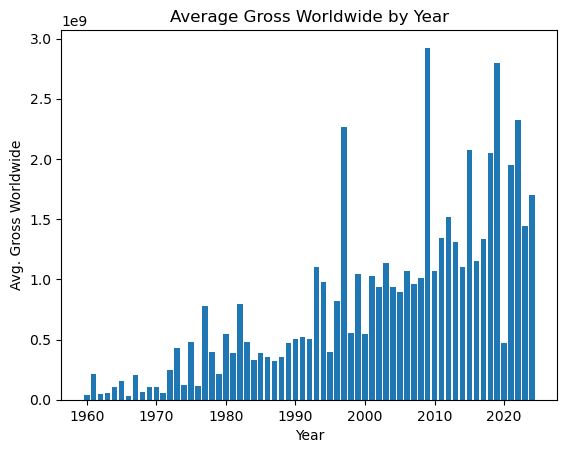

In [131]:
#Plot a bar graph with the year on the x-axis and the gross worldwide on the y-axis
plt.title("Average Gross Worldwide by Year") 
plt.xlabel('Year')
plt.ylabel('Avg. Gross Worldwide')

plt.locator_params(axis='y', nbins=10)
plt.bar(imdb_all_years_df['Year'], imdb_all_years_df['grossWorldWide'])

<BarContainer object of 33600 artists>

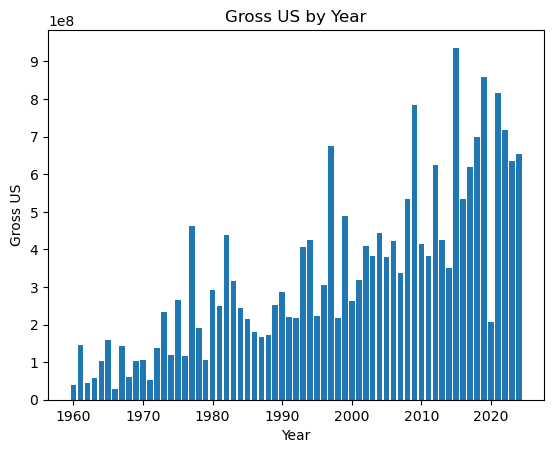

In [103]:
#Plot a bar graph with the year on the x-axis and the gross US on the y-axis
plt.title("Average Gross US by Year") 
plt.xlabel('Year')
plt.ylabel('Avg. Gross US')

plt.locator_params(axis='y', nbins=10)
plt.bar(imdb_all_years_df['Year'], imdb_all_years_df['gross_US_Canada'])

In [6]:
#Add new column for profit
imdb_all_years_df['Profit'] =  imdb_all_years_df['grossWorldWide'] - imdb_all_years_df['budget']
#Add new column for profit margin
imdb_all_years_df['Profit Margin'] = imdb_all_years_df['Profit'] / imdb_all_years_df['budget']
#add new column for ratio of budget to grossWorldWide
imdb_all_years_df['Budget to Gross Ratio'] = imdb_all_years_df['budget'] / imdb_all_years_df['grossWorldWide']

imdb_all_years_df['Profit'].describe()

count    9.406000e+03
mean    -3.386014e+07
std      3.214523e+09
min     -2.999844e+11
25%     -4.735026e+06
50%      3.834980e+05
75%      3.102142e+07
max      2.686706e+09
Name: Profit, dtype: float64

<BarContainer object of 33600 artists>

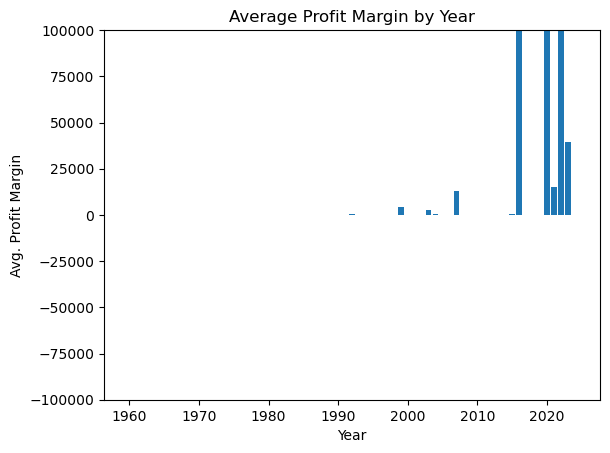

In [ ]:
#Plot a bar graph with the year on the x-axis and the profit marign on the y-axis
plt.title("Average Profit Margin by Year")
plt.xlabel('Year')
plt.ylabel('Avg. Profit Margin')
#raise bar chart x axis up to show negative values
plt.ylim(-900000, 900000)
plt.bar(imdb_all_years_df['Year'], imdb_all_years_df['Profit Margin'])



<BarContainer object of 33600 artists>

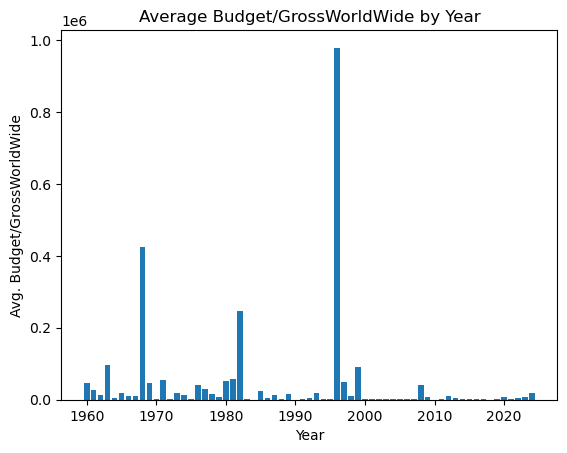

In [ ]:
#Plot a bar graph with the year on the x-axis and the budget to grossworldwide on the y-axis
plt.title("Average Budget/GrossWorldWide by Year")
plt.xlabel('Year')
plt.ylabel('Avg. Budget/GrossWorldWide')
plt.bar(imdb_all_years_df['Year'], imdb_all_years_df['Budget to Gross Ratio'])

In [119]:
#Its Clear from the above graph that movies on average dont make much money until recently.
imdb_all_years_df.sort_values(by='Budget to Gross Ratio', ascending=True)

,Title,Movie Link,Year,Duration,MPA,Rating,Votes,budget,grossWorldWide,gross_US_Canada,...,filming_locations,production_companies,Languages,wins,nominations,oscars,release_date,Profit,Profit Margin,Budget to Gross Ratio
33599,A Sacrifice,A Sacrifice,2024,1h 34m,R,5.1,4300,0.0,130017.0,0.0,...,[],"['Scott Free Productions', 'Augenschein Filmpr...","['English', 'German']",0,0,0,2024.0,130017.0,inf,0.0
29049,King Cobra,King Cobra,2016,1h 31m,Not Rated,5.6,9700,0.0,81757.0,81757.0,...,['USA'],"['Rabbit Bandini Productions', 'Yale Productio...",['English'],0,2,0,2016.0,81757.0,inf,0.0
29050,For the Love of Spock,For the Love of Spock,2016,1h 51m,Not Rated,7.6,5000,0.0,80141.0,80141.0,...,[],"['455 Films', 'For The Love Of Spock Productio...",['English'],0,0,0,2016.0,80141.0,inf,0.0
29051,My Best Friend's Wedding,My Best Friend's Wedding,2016,1h 31m,PG,5.1,371,0.0,5707770.0,78578.0,...,"['Milan, Lombardia, Italy']","['China Film Group Corporation (CFGC)', 'India...",['Chinese'],0,2,0,2016.0,5707770.0,inf,0.0
29052,Stefan Zweig: Farewell to Europe,Stefan Zweig: Farewell to Europe,2016,1h 46m,0,6.7,2700,0.0,1370772.0,78372.0,...,['São Tomé e Príncipe'],"['X-Filme Creative Pool', 'Idéale Audience', '...","['Russian', 'German', 'English', 'Portuguese',...",0,10,0,2016.0,1370772.0,inf,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22881,36th Precinct,36th Precinct,2004,1h 51m,Not Rated,7.1,19000,13580000.0,0.0,0.0,...,"['Rue de Harlay, Paris 1, Paris, France']","['Gaumont', 'LGM Productions', 'TF1 Films Prod...",['French'],0,10,0,2004.0,-13580000.0,-1.0,inf
31799,Cherry,Cherry,2021,2h 22m,R,6.6,39000,40000000.0,0.0,0.0,...,"['AlUla, Saudi Arabia']","['The Hideaway Entertainment', 'AGBO', 'Kasbah...",['English'],0,5,0,2021.0,-40000000.0,-1.0,inf
22880,Murder-Set-Pieces,Murder-Set-Pieces,2004,1h 45m,R,3.7,4600,2000000.0,0.0,0.0,...,"['Las Vegas, Nevada, USA']",['Fright Flix Productions'],"['English', 'German']",0,0,0,2004.0,-2000000.0,-1.0,inf
7757,Hard Times,Hard Times,1975,1h 33m,PG,7.2,13000,2700000.0,0.0,0.0,...,"['French Quarter, New Orleans, Louisiana, USA']","['Columbia Pictures', 'Columbia Pictures', 'Cl...",['English'],0,0,0,1975.0,-2700000.0,-1.0,inf
